In [50]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix

# **Load the Data**

In [51]:
from google.colab import drive
drive.mount('/content/drive')

# Load data dari file .csv ke dataframe dan keluarkan shape-nya
df = pd.read_csv('/content/drive/MyDrive/Materi Day 16/life_expectancy_data.csv')
df.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_or_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
714,Democratic People's Republic of Korea,2006,Developing,68.5,165.0,10,3.28,0.000000,96.0,0,...,98.0,NaN,89.0,0.1,NaN,NaN,5.6,5.6,NaN,NaN
2168,Saint Lucia,2015,Developing,75.2,138.0,0,NaN,0.000000,99.0,0,...,99.0,NaN,99.0,0.1,NaN,NaN,4.3,4.3,0.735,13.1
498,Canada,2013,Developing,81.8,67.0,2,8.20,9733.228019,55.0,83,...,91.0,1.67,91.0,0.1,52413.721160,35155451.0,0.5,0.5,0.909,15.9
387,Bulgaria,2012,Developed,73.9,139.0,1,10.99,851.450672,95.0,1,...,95.0,7.11,95.0,0.1,7378.255390,735888.0,1.9,1.9,0.778,14.3
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4


In [52]:
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life_expectancy ',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles ',
 ' BMI ',
 'under_five_deaths ',
 'Polio',
 'Total_expenditure',
 'Diphtheria ',
 ' HIV_or_AIDS',
 'GDP',
 'Population',
 ' thinness_1_19_years',
 ' thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling']

In [53]:
# Merapikan nama-nama kolom
column_mapping = {'Life_expectancy ': 'Life_expectancy', 'infant_deaths': 'Infant_deaths', 'percentage_expenditure': 'Percentage_expenditure', 'Measles ': 'Measles', ' BMI ': 'BMI', 'under_five_deaths ': 'Under_five_deaths', 'Diphtheria ': 'Diphtheria', ' HIV_or_AIDS': 'HIV_or_AIDS', ' thinness_1_19_years': 'Thinness_1_19_years', ' thinness_5_9_years': 'Thinness_5_9_years'}
df.rename(columns=column_mapping, inplace=True)

# Memindahkan kolom "Life_expectancy" ke paling akhir
df['Life_expectancy'] = df.pop('Life_expectancy')
columns = list(df.columns)
columns

['Country',
 'Year',
 'Status',
 'Adult_Mortality',
 'Infant_deaths',
 'Alcohol',
 'Percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Under_five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV_or_AIDS',
 'GDP',
 'Population',
 'Thinness_1_19_years',
 'Thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling',
 'Life_expectancy']

In [54]:
features = list(df.columns)[0:-1]
label = list(df.columns)[-1]
print('Jadi features dari dataset ini adalah:')
for feature in features:
    print(feature)
print()
print('Sedangkan targetnya adalah', label)

Jadi features dari dataset ini adalah:
Country
Year
Status
Adult_Mortality
Infant_deaths
Alcohol
Percentage_expenditure
Hepatitis_B
Measles
BMI
Under_five_deaths
Polio
Total_expenditure
Diphtheria
HIV_or_AIDS
GDP
Population
Thinness_1_19_years
Thinness_5_9_years
Income_composition_of_resources
Schooling

Sedangkan targetnya adalah Life_expectancy


In [55]:
# Split dataset menjadi train dan test, dengan rasio train:test = 3:1.
# Keluarkan shape dari train dan test set dengan perintah train.shape dan test.shape.

train, test = train_test_split(df, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(2203, 22)
(735, 22)


# **Data Exploration**
 *(only for train data)*

*a. Mencari tahu feature-feature yang mengandung null value*

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 2737 to 860
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2203 non-null   object 
 1   Year                             2203 non-null   int64  
 2   Status                           2203 non-null   object 
 3   Adult_Mortality                  2196 non-null   float64
 4   Infant_deaths                    2203 non-null   int64  
 5   Alcohol                          2057 non-null   float64
 6   Percentage_expenditure           2203 non-null   float64
 7   Hepatitis_B                      1799 non-null   float64
 8   Measles                          2203 non-null   int64  
 9   BMI                              2177 non-null   float64
 10  Under_five_deaths                2203 non-null   int64  
 11  Polio                            2192 non-null   float64
 12  Total_expenditure 

In [57]:
null_features_train = train.columns[train.isnull().any()]
null_counts = train[null_features_train].isnull().sum()

print('Jadi feature-feature yang mengandung null value dan banyak null valuenya adalah:')
for feature, count in zip(null_features_train, null_counts):
    print(f'{feature:<30} {count}')

Jadi feature-feature yang mengandung null value dan banyak null valuenya adalah:
Adult_Mortality                7
Alcohol                        146
Hepatitis_B                    404
BMI                            26
Polio                          11
Total_expenditure              171
Diphtheria                     11
GDP                            325
Population                     484
Thinness_1_19_years            26
Thinness_5_9_years             26
Income_composition_of_resources 124
Schooling                      123
Life_expectancy                7


*b. Mencari tahu apakah feature-feature sudah memiliki scale yg sama*

In [58]:
train.describe()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_or_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_expectancy
count,2203.000000,2196.000000,2203.000000,2057.000000,2203.000000,1799.000000,2203.000000,2177.000000,2203.000000,2192.000000,2032.000000,2192.000000,2203.000000,1878.000000,1.719000e+03,2177.000000,2177.000000,2079.000000,2080.000000,2196.000000
mean,2007.569224,165.155282,28.615978,4.598799,719.316045,81.183435,2348.684521,38.471796,39.952338,82.750912,5.930000,82.384580,1.758284,7346.589043,1.204519e+07,4.814424,4.865319,0.631381,12.044471,69.345355
std,4.591397,124.462742,110.757132,4.041087,1961.603898,24.791763,11839.626538,20.154119,152.196223,23.306091,2.502456,23.818889,5.179996,14207.605138,5.619197e+07,4.391639,4.483311,0.207114,3.320415,9.526132
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,0.850000,5.667245,77.000000,0.000000,19.300000,0.000000,78.000000,4.240000,78.000000,0.100000,469.289582,1.947545e+05,1.600000,1.600000,0.496000,10.200000,63.300000
50%,2008.000000,144.000000,3.000000,3.770000,66.729339,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1814.990896,1.425453e+06,3.300000,3.300000,0.682000,12.400000,72.200000
75%,2012.000000,228.000000,21.000000,7.680000,439.527313,97.000000,366.500000,56.200000,26.000000,97.000000,7.500000,97.000000,0.750000,5873.386491,7.494542e+06,7.100000,7.200000,0.779000,14.300000,75.700000
max,2015.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.200000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


**Jika dilihat dari distribusi data di atas, terlihat bahwa features tidak berada di scale yang sama.**

mari kita buktikan:

In [59]:
# Filter hanya numerik feature
num = train.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaler.fit(num)
scaled_train = scaler.transform(num)
scaled_train_mean = np.mean(scaled_train, axis=0)
scaled_train_std = np.std(scaled_train, axis=0)

# Cek apakah standar deviasi dan mean ada di scale yg sama untuk setiap fitur
same_std = np.allclose(scaled_train_std, 1.0)
same_mean = np.allclose(scaled_train_mean, 1.0)
print(same_std)
print(same_mean)

False
False


**Sudah lebih jelas bahwa feature - feature tersebut tidak berada di scale yang sama.**

*c. Mencari tahu apakah ada non-numerical features*

In [90]:
non_numerical_features_train = train.select_dtypes(exclude=['float64', 'int64']).columns
print('Jadi, non numerical features yang terdapat pada dataset ini adalah:', list(non_numerical_features_train))

Jadi, non numerical features yang terdapat pada dataset ini adalah: ['Country', 'Status']


*d. Melihat pasangan-pasangan features yang berkorelasi >= 0.5*

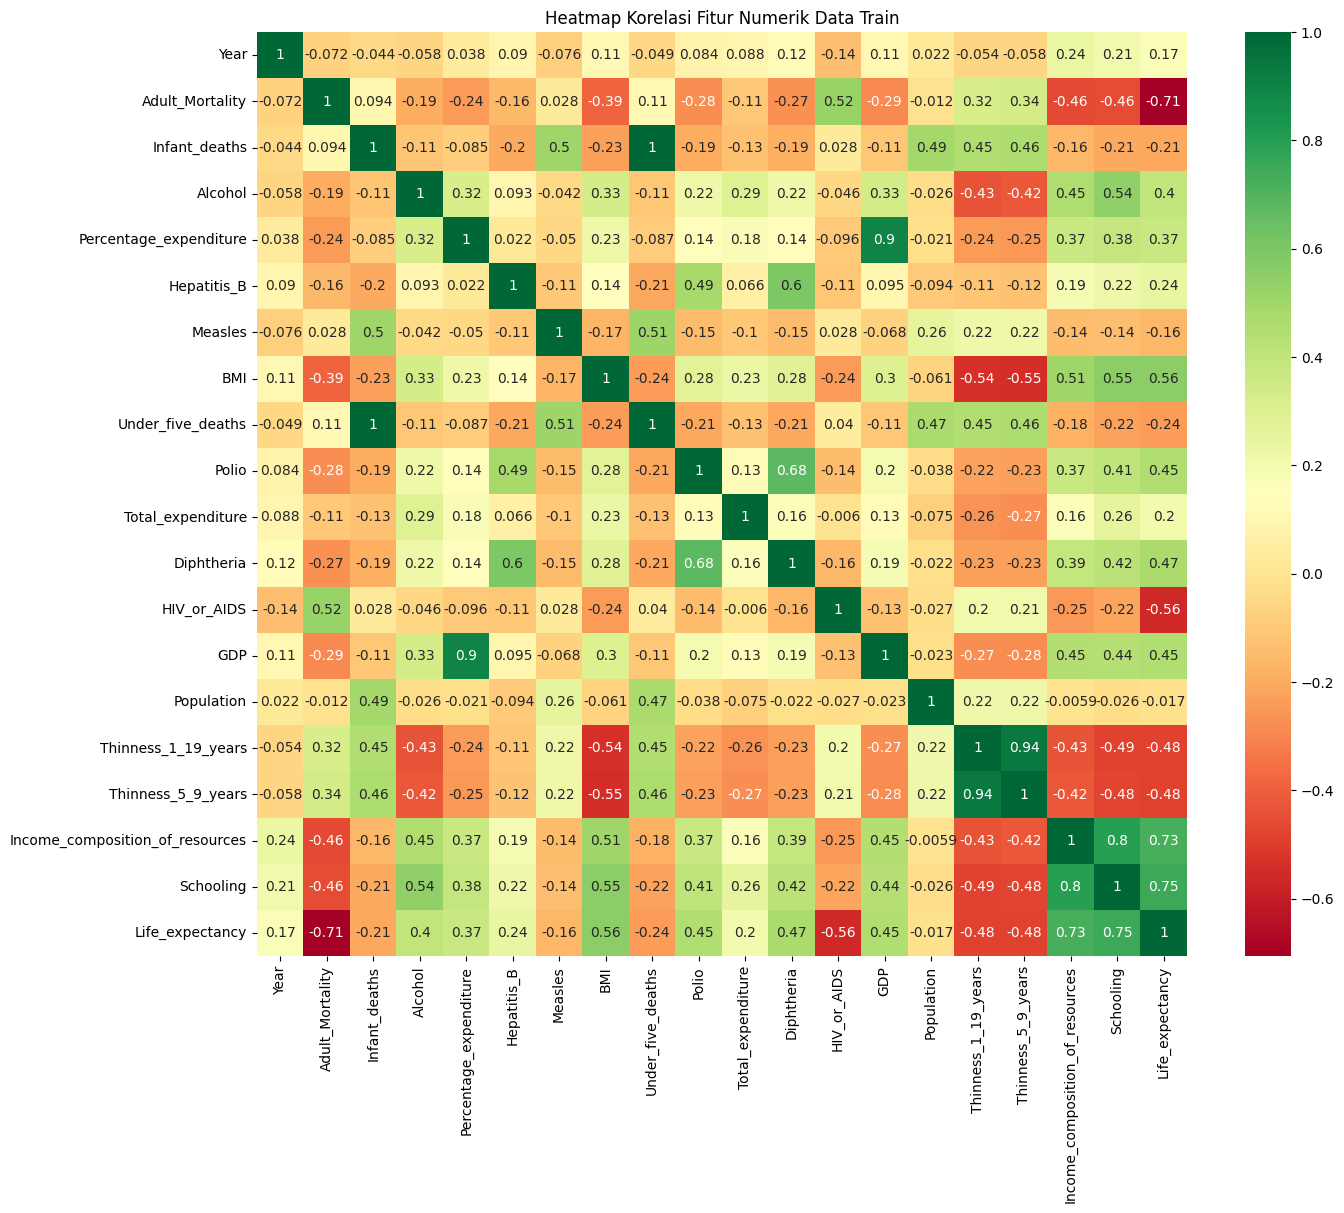

In [61]:
numeric_features = train.select_dtypes(include=[np.number]).columns
# Menghitung matriks korelasi
correlation_matrix = train[numeric_features].corr()

# Coba kita lihat dulu pada heatmap correlation
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title('Heatmap Korelasi Fitur Numerik Data Train')
plt.show()

In [91]:
n = correlation_matrix.shape[1]
high_correlation_features = []

for i in range(n):
    for j in range(i + 1, n):
        if correlation_matrix.columns[i] != label and correlation_matrix.columns[j] != label:
            if correlation_matrix.iloc[i, j] >= 0.5:
                feature_1 = correlation_matrix.columns[i]
                feature_2 = correlation_matrix.columns[j]
                high_correlation_features.append((feature_1, feature_2))

print("Jadi, pasangan-pasangan fitur yang memiliki korelasi >= 0.5 adalah:")
for feature_pair in high_correlation_features:
    print(f"{feature_pair[0]} - {feature_pair[1]}")

Jadi, pasangan-pasangan fitur yang memiliki korelasi >= 0.5 adalah:
Adult_Mortality - HIV_or_AIDS
Infant_deaths - Measles
Infant_deaths - Under_five_deaths
Alcohol - Schooling
Percentage_expenditure - GDP
Hepatitis_B - Diphtheria
Measles - Under_five_deaths
BMI - Income_composition_of_resources
BMI - Schooling
Polio - Diphtheria
Thinness_1_19_years - Thinness_5_9_years
Income_composition_of_resources - Schooling


*e. Mencari feature yang paling berkolerasi dengan target*

In [63]:
# saya ingin melihat features yang memiliki korelaso >= 0 dengan target
correlation_with_target = correlation_matrix[label].drop(labels=[label])
high_corr_with_target = correlation_with_target[correlation_with_target >= 0].index.tolist()

print("Fitur-fitur yang memiliki korelasi positif terhadap target adalah:")
for feature in high_corr_with_target:
    print(feature)

Fitur-fitur yang memiliki korelasi positif terhadap target adalah:
Year
Alcohol
Percentage_expenditure
Hepatitis_B
BMI
Polio
Total_expenditure
Diphtheria
GDP
Income_composition_of_resources
Schooling


In [64]:
most_correlated_feature = correlation_with_target.idxmax()
print("Feature yang paling berkorelasi dengan target adalah",most_correlated_feature)

Feature yang paling berkorelasi dengan target adalah Schooling


*f. Melihat feature yang tampak mempunyai linear relationship dengan target*

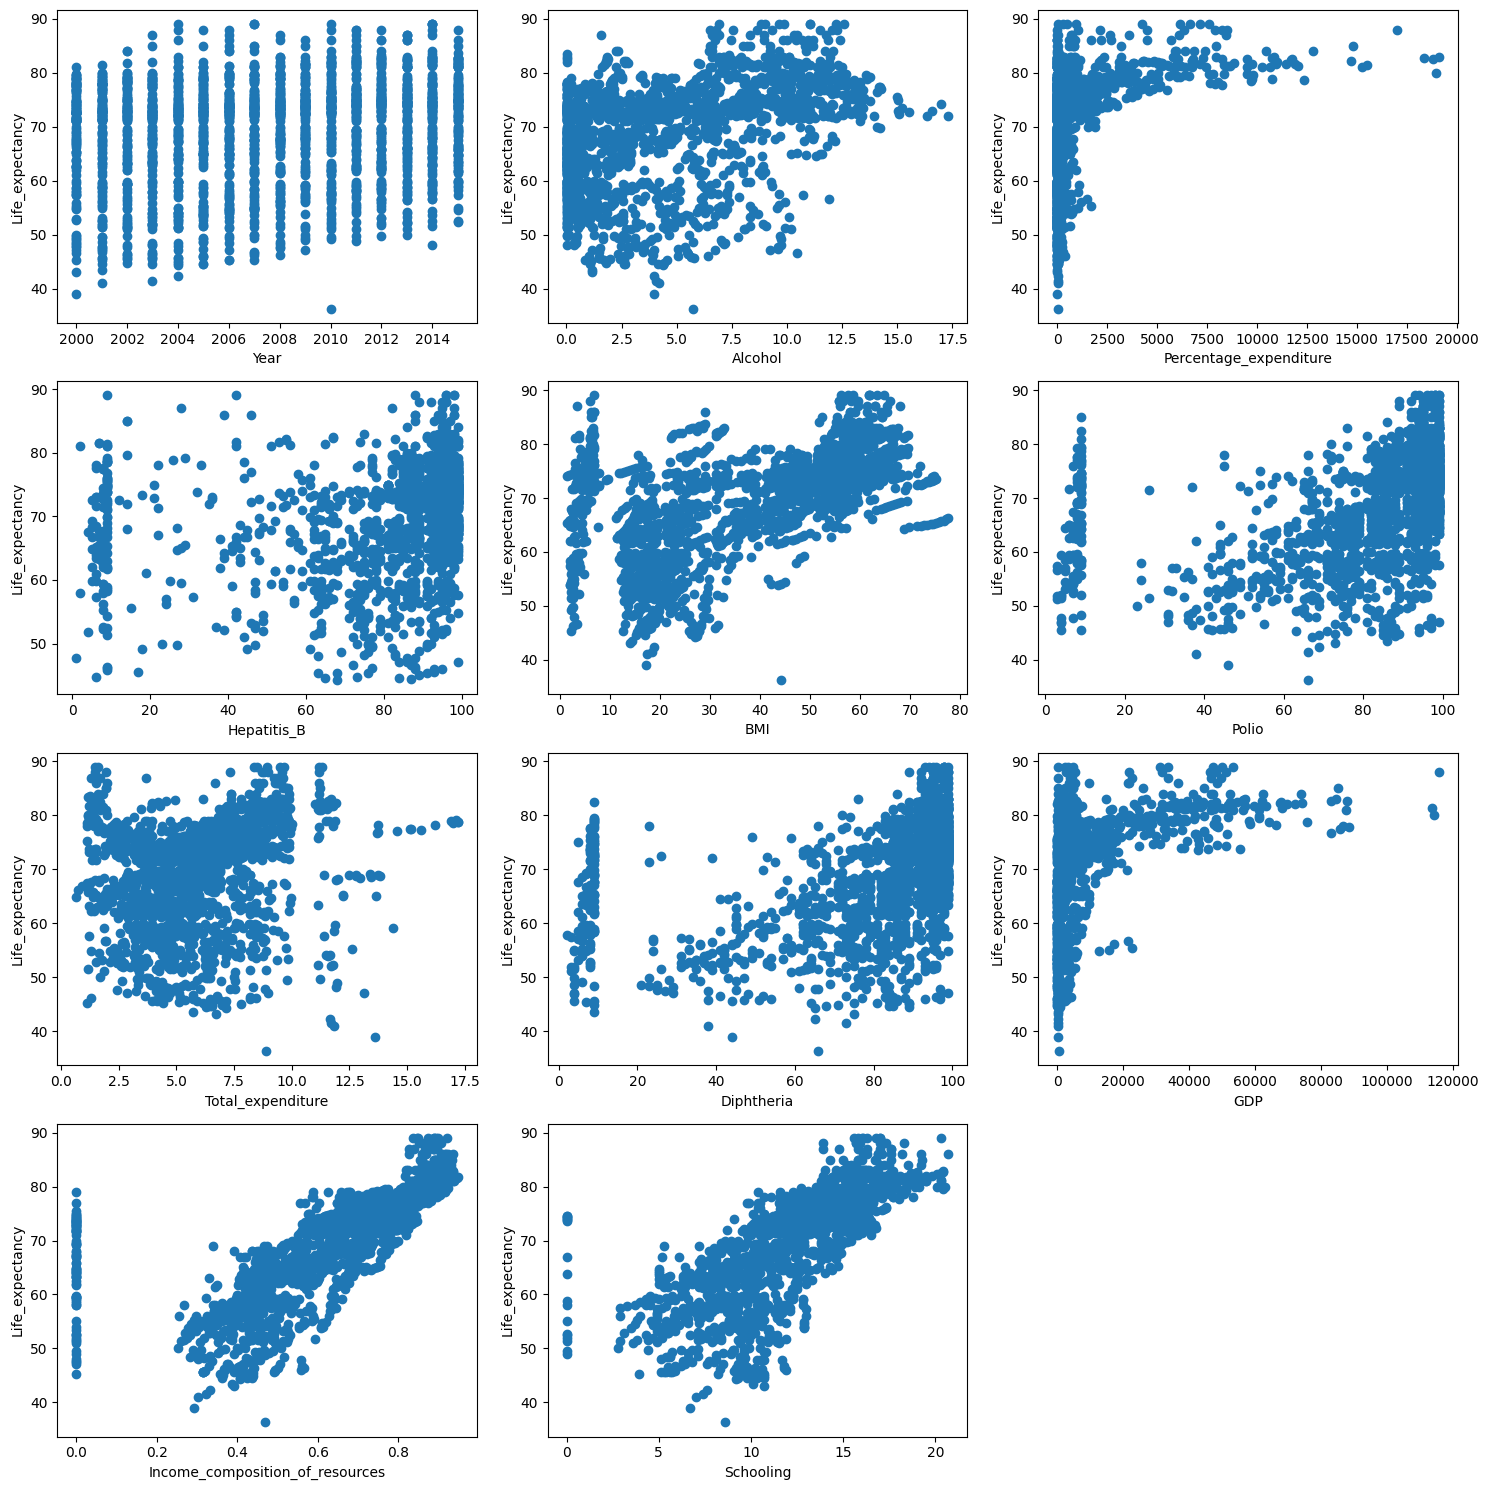

In [65]:
plt.figure(figsize=(15, 15))
cols = 3
rows = (len(high_corr_with_target) + 1) // cols

for i, feature in enumerate(high_corr_with_target):
    if feature in train.columns:
        plt.subplot(rows, cols, i+1)
        plt.scatter(train[feature], train[label])
        plt.xlabel(feature)
        plt.ylabel(label)

plt.tight_layout()
plt.show()

**Berdasarkan hasil scatterplot di atas, dapat dilihat bahwa feature yang memiliki korelasi linear dengan target yaitu Income_compotition_of_resources dan Schooling.**

# Feature Engineering #
(Sesuai instruksi, data set train dan test dilakukan secara terpisah pada step ini)

In [66]:
# Fungsi handling null value
def drop_null_values(dataframe):
    dataframe = dataframe.dropna()
    return dataframe

# Fungsi feature scaling
def standard_scaler(dataframe, columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe[columns])
    dataframe[columns] = scaled_data
    return dataframe

**Data Train**

*a. Null Value Handling*

In [67]:
null_features_train = train.columns[train.isnull().any()]
null_counts = train[null_features_train].isnull().sum()

print('Feature-feature yang mengandung null value dan banyak null valuenya adalah:')
for feature, count in zip(null_features_train, null_counts):
    print(f'{feature:<30} {count}')

Feature-feature yang mengandung null value dan banyak null valuenya adalah:
Adult_Mortality                7
Alcohol                        146
Hepatitis_B                    404
BMI                            26
Polio                          11
Total_expenditure              171
Diphtheria                     11
GDP                            325
Population                     484
Thinness_1_19_years            26
Thinness_5_9_years             26
Income_composition_of_resources 124
Schooling                      123
Life_expectancy                7


In [68]:
train = train.dropna()
null_counts = train.isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 2737 to 860
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1252 non-null   object 
 1   Year                             1252 non-null   int64  
 2   Status                           1252 non-null   object 
 3   Adult_Mortality                  1252 non-null   float64
 4   Infant_deaths                    1252 non-null   int64  
 5   Alcohol                          1252 non-null   float64
 6   Percentage_expenditure           1252 non-null   float64
 7   Hepatitis_B                      1252 non-null   float64
 8   Measles                          1252 non-null   int64  
 9   BMI                              1252 non-null   float64
 10  Under_five_deaths                1252 non-null   int64  
 11  Polio                            1252 non-null   float64
 12  Total_expenditure 

Data train sudah clean dan jumlah data point yang tersisa setelah dilakukan drop null value adalah 1252.

*b.	Initial Feature Selection*

In [69]:
# First i'll define non-numeric columns to be dropped
non_numerical_features_train = train.select_dtypes(exclude=['float64', 'int64']).columns
print('Non numerical features pada dataset ini adalah:', list(non_numerical_features_train))

Non numerical features pada dataset ini adalah: ['Country', 'Status']


In [70]:
# Drop non numeric feature dari data train
train_numeric = train.drop(non_numerical_features_train, axis=1)
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 2737 to 860
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1252 non-null   int64  
 1   Adult_Mortality                  1252 non-null   float64
 2   Infant_deaths                    1252 non-null   int64  
 3   Alcohol                          1252 non-null   float64
 4   Percentage_expenditure           1252 non-null   float64
 5   Hepatitis_B                      1252 non-null   float64
 6   Measles                          1252 non-null   int64  
 7   BMI                              1252 non-null   float64
 8   Under_five_deaths                1252 non-null   int64  
 9   Polio                            1252 non-null   float64
 10  Total_expenditure                1252 non-null   float64
 11  Diphtheria                       1252 non-null   float64
 12  HIV_or_AIDS       

Feature non numeric Country dan Status sudah hilang dari dataset.

*c. Feature Scalling*

In [71]:
train_features = train_numeric.columns[0:-1]
train_target = train_numeric.columns[-1]
print(f'Nama-nama fitur dari data train adalah:', list(train_features))
print(f'Nama target dari data train adalah:', train_target)

Nama-nama fitur dari data train adalah: ['Year', 'Adult_Mortality', 'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_or_AIDS', 'GDP', 'Population', 'Thinness_1_19_years', 'Thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']
Nama target dari data train adalah: Life_expectancy


In [72]:
train_update = standard_scaler(train_numeric, train_features)
train_update.describe()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_or_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_expectancy
count,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1252.000000
mean,-2.387582e-14,-8.512892e-17,-8.512892e-18,2.270105e-17,2.837631e-17,-2.319763e-16,1.418815e-18,-1.007359e-16,-8.512892e-18,2.539680e-16,1.617450e-16,-2.951136e-16,-1.702578e-17,-4.823972e-17,6.029965e-18,2.837631e-18,6.810314e-17,2.837631e-16,-2.667373e-16,69.253834
std,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,8.858699
min,-1.923038e+00,-1.330443e+00,-2.698212e-01,-1.129597e+00,-3.898222e-01,-3.101253e+00,-2.094931e-01,-1.841690e+00,-2.705506e-01,-3.456153e+00,-2.279062e+00,-3.675169e+00,-3.153282e-01,-4.830869e-01,-2.102296e-01,-1.050874e+00,-1.058079e+00,-3.462708e+00,-2.815328e+00,44.300000
25%,-6.962759e-01,-7.299893e-01,-2.603937e-01,-9.439055e-01,-3.679881e-01,-1.822688e-01,-2.094931e-01,-9.465512e-01,-2.636584e-01,-1.814513e-01,-6.601558e-01,-8.773928e-02,-3.153282e-01,-4.406680e-01,-2.071702e-01,-6.949443e-01,-7.050156e-01,-6.517613e-01,-6.314879e-01,64.400000
50%,3.978160e-02,-1.690387e-01,-2.415387e-01,-1.717546e-01,-3.050419e-01,3.775363e-01,-2.080930e-01,2.924820e-01,-2.429819e-01,3.861637e-01,-5.361130e-02,3.733411e-01,-3.153282e-01,-3.370501e-01,-1.876134e-01,-4.057514e-01,-3.960855e-01,2.377095e-01,6.006141e-02,71.800000
75%,7.758391e-01,4.630184e-01,-7.184339e-02,7.023076e-01,-9.163633e-02,6.574389e-01,-1.694019e-01,8.791262e-01,-8.963121e-02,6.044772e-01,6.456603e-01,5.982583e-01,-2.189672e-01,-4.791859e-02,-9.050134e-02,4.840730e-01,4.865720e-01,6.598312e-01,6.424187e-01,74.925000
max,1.757249e+00,4.373871e+00,1.481420e+01,3.196949e+00,1.079353e+01,7.773972e-01,1.316885e+01,1.956327e+00,1.420300e+01,6.918026e-01,3.677292e+00,6.882252e-01,7.795054e+00,1.019988e+01,1.992013e+01,4.977686e+00,5.142590e+00,1.668538e+00,3.117437e+00,89.000000


**Data Test**

*a. Null Value Handling*

In [73]:
null_features_test = test.columns[test.isnull().any()]
null_counts = test[null_features_test].isnull().sum()

print('Feature-feature yang mengandung null value dan banyak null valuenya adalah:')
for feature, count in zip(null_features_test, null_counts):
    print(f'{feature:<30} {count}')

Feature-feature yang mengandung null value dan banyak null valuenya adalah:
Adult_Mortality                3
Alcohol                        48
Hepatitis_B                    149
BMI                            8
Polio                          8
Total_expenditure              55
Diphtheria                     8
GDP                            123
Population                     168
Thinness_1_19_years            8
Thinness_5_9_years             8
Income_composition_of_resources 43
Schooling                      40
Life_expectancy                3


In [74]:
test = test.dropna()
null_counts = test.isnull().sum()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 2546 to 1762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          397 non-null    object 
 1   Year                             397 non-null    int64  
 2   Status                           397 non-null    object 
 3   Adult_Mortality                  397 non-null    float64
 4   Infant_deaths                    397 non-null    int64  
 5   Alcohol                          397 non-null    float64
 6   Percentage_expenditure           397 non-null    float64
 7   Hepatitis_B                      397 non-null    float64
 8   Measles                          397 non-null    int64  
 9   BMI                              397 non-null    float64
 10  Under_five_deaths                397 non-null    int64  
 11  Polio                            397 non-null    float64
 12  Total_expenditure 

Data test sudah clean dan jumlah data point yang tersisa setelah dilakukan drop null value adalah 397.

*b.	Initial Feature Selection*

In [75]:
# First i'll define non-numeric columns to be dropped
non_numerical_features_test = test.select_dtypes(exclude=['float64', 'int64']).columns
print('Non numerical features pada dataset ini adalah:', list(non_numerical_features_test))

Non numerical features pada dataset ini adalah: ['Country', 'Status']


In [76]:
# Drop non numeric feature dari data test
test_numeric = test.drop(non_numerical_features_test, axis=1)
test_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 2546 to 1762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             397 non-null    int64  
 1   Adult_Mortality                  397 non-null    float64
 2   Infant_deaths                    397 non-null    int64  
 3   Alcohol                          397 non-null    float64
 4   Percentage_expenditure           397 non-null    float64
 5   Hepatitis_B                      397 non-null    float64
 6   Measles                          397 non-null    int64  
 7   BMI                              397 non-null    float64
 8   Under_five_deaths                397 non-null    int64  
 9   Polio                            397 non-null    float64
 10  Total_expenditure                397 non-null    float64
 11  Diphtheria                       397 non-null    float64
 12  HIV_or_AIDS       

Feature non numeric Country dan Status sudah hilang dari dataset.

*c. Feature Scalling*

In [77]:
test_features = test_numeric.columns[0:-1]
test_target = test_numeric.columns[-1]
print(f'Nama-nama fitur dari data test adalah:', list(test_features))
print(f'Nama target dari data test adalah:', test_target)

Nama-nama fitur dari data test adalah: ['Year', 'Adult_Mortality', 'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_or_AIDS', 'GDP', 'Population', 'Thinness_1_19_years', 'Thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']
Nama target dari data test adalah: Life_expectancy


In [78]:
test_update = standard_scaler(test_numeric, test_features)
test_update.describe()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_or_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_expectancy
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,397.000000
mean,-2.067196e-15,-8.948901e-18,-3.355838e-17,2.170108e-16,2.237225e-17,-2.281970e-16,-8.948901e-18,-8.948901e-17,-8.948901e-18,2.818904e-16,1.498941e-16,2.634333e-16,-1.789780e-17,5.593063e-17,1.342335e-17,-2.013503e-17,-6.264231e-17,3.982261e-16,2.069433e-16,69.455164
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,8.608036
min,-1.905051e+00,-1.351064e+00,-2.846723e-01,-1.102985e+00,-4.221800e-01,-2.784916e+00,-2.540985e-01,-1.788129e+00,-2.872945e-01,-3.920640e+00,-2.229673e+00,-4.179441e+00,-3.047895e-01,-4.985071e-01,-2.098758e-01,-9.854156e-01,-9.670246e-01,-3.412686e+00,-2.679851e+00,44.000000
25%,-9.341843e-01,-7.312860e-01,-2.846723e-01,-8.917805e-01,-4.026489e-01,-1.881239e-01,-2.540985e-01,-9.174954e-01,-2.824966e-01,-1.366964e-01,-7.084782e-01,-1.861506e-01,-3.047895e-01,-4.642886e-01,-2.078068e-01,-7.000691e-01,-6.877747e-01,-6.826435e-01,-6.033160e-01,64.300000
50%,3.668263e-02,-1.362991e-01,-2.656750e-01,-2.241803e-01,-3.471192e-01,4.702177e-01,-2.527075e-01,2.077096e-01,-2.681029e-01,4.380799e-01,-3.622228e-02,3.843194e-01,-3.047895e-01,-3.789754e-01,-1.947228e-01,-3.535770e-01,-3.486856e-01,1.715085e-01,4.347373e-02,71.600000
75%,7.648328e-01,4.834789e-01,-1.200291e-01,6.764729e-01,-1.462227e-01,6.530904e-01,-2.234144e-01,9.459663e-01,-1.001760e-01,5.817740e-01,7.179110e-01,5.917631e-01,-2.114674e-01,-1.392505e-01,-1.253702e-01,4.616986e-01,4.292249e-01,6.364267e-01,6.562219e-01,75.000000
max,1.492983e+00,4.549222e+00,9.213975e+00,3.232774e+00,7.957998e+00,7.628140e-01,1.050097e+01,1.862423e+00,9.308526e+00,6.775700e-01,2.601090e+00,6.954849e-01,7.832898e+00,8.509954e+00,1.315085e+01,4.538077e+00,4.617973e+00,1.577075e+00,2.902965e+00,89.000000


# Modeling

In [79]:
def train_model(X, y):
    lr = LinearRegression()
    lr.fit(X, y)

    return lr

In [80]:
X = train_update[train_features]
y = train_update[train_target]

sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns = list(X.columns)
X_std.describe()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_or_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling
count,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1252.000000,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1.252000e+03,1252.000000,1.252000e+03,1.252000e+03,1.252000e+03
mean,3.688920e-17,-1.135052e-17,-1.064112e-17,1.702578e-17,-5.675261e-18,2.128223e-18,1.418815e-18,-2.695749e-17,-7.094077e-18,0.000000,-5.675261e-18,3.688920e-17,-1.135052e-17,2.837631e-18,9.222300e-18,0.000000,-5.675261e-18,-5.675261e-18,-2.837631e-18
std,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400,1.000400e+00,1.000400e+00,1.000400e+00
min,-1.923038e+00,-1.330443e+00,-2.698212e-01,-1.129597e+00,-3.898222e-01,-3.101253e+00,-2.094931e-01,-1.841690e+00,-2.705506e-01,-3.456153,-2.279062e+00,-3.675169e+00,-3.153282e-01,-4.830869e-01,-2.102296e-01,-1.050874,-1.058079e+00,-3.462708e+00,-2.815328e+00
25%,-6.962759e-01,-7.299893e-01,-2.603937e-01,-9.439055e-01,-3.679881e-01,-1.822688e-01,-2.094931e-01,-9.465512e-01,-2.636584e-01,-0.181451,-6.601558e-01,-8.773928e-02,-3.153282e-01,-4.406680e-01,-2.071702e-01,-0.694944,-7.050156e-01,-6.517613e-01,-6.314879e-01
50%,3.978160e-02,-1.690387e-01,-2.415387e-01,-1.717546e-01,-3.050419e-01,3.775363e-01,-2.080930e-01,2.924820e-01,-2.429819e-01,0.386164,-5.361130e-02,3.733411e-01,-3.153282e-01,-3.370501e-01,-1.876134e-01,-0.405751,-3.960855e-01,2.377095e-01,6.006141e-02
75%,7.758391e-01,4.630184e-01,-7.184339e-02,7.023076e-01,-9.163633e-02,6.574389e-01,-1.694019e-01,8.791262e-01,-8.963121e-02,0.604477,6.456603e-01,5.982583e-01,-2.189672e-01,-4.791859e-02,-9.050134e-02,0.484073,4.865720e-01,6.598312e-01,6.424187e-01
max,1.757249e+00,4.373871e+00,1.481420e+01,3.196949e+00,1.079353e+01,7.773972e-01,1.316885e+01,1.956327e+00,1.420300e+01,0.691803,3.677292e+00,6.882252e-01,7.795054e+00,1.019988e+01,1.992013e+01,4.977686,5.142590e+00,1.668538e+00,3.117437e+00


In [81]:
# Model's error on training data
lr = train_model(X,y)

y_pred = lr.predict(X)
residuals = y - y_pred
MSE = np.mean(residuals**2)
RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

RMSE: 3.624183222030158


<Axes: >

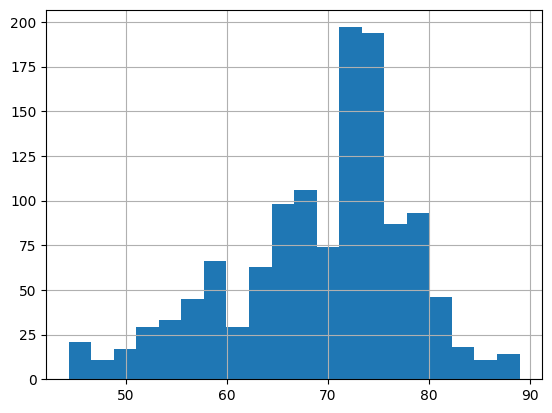

In [82]:
y.hist(bins=20)

In [83]:
# Model's error on testing data
X_test = test_update[test_features]
y_test = test_update[test_target]

y_test_pred = lr.predict(X_test)
residuals_test = y_test - y_test_pred
MSE = np.mean(residuals_test**2)
RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

RMSE: 3.320532660988513


<Axes: >

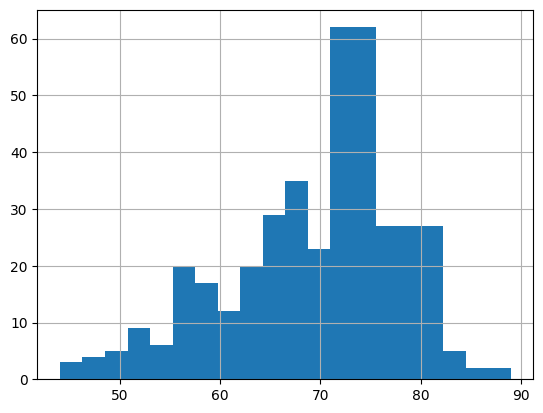

In [84]:
y_test.hist(bins=20)

Berdasarkan hasil RMSE (Root Mean Squared Error), terlihat bahwa kinerja model pada data training dan testing sangat baik, dengan perbedaan yang tidak signifikan dalam metrik kesalahan. RMSE dari test data terlihat lebih kecil (sekitar 0.3) dari RMSE train data dapat mengindikasikan bahwa model memiliki tingkat kesalahan yang lebih rendah pada data testing dibandingkan dengan data training.

Namun, mungkin penting juga untuk melakukan evaluasi yang lebih komprehensif dan mempertimbangkan metrik evaluasi lainnya serta konteks domain untuk mendapatkan pemahaman yang lebih lengkap tentang kinerja model ini.

# Interpretasi Model #

In [85]:
import statsmodels.api as sm

X = train_update[train_features]
y = train_update[train_target]

# Menambahkan konstanta ke data train
X_ols = sm.add_constant(X)

# Membuat model OLS
model_ols = sm.OLS(y, X_ols)

# Melatih model OLS
results = model_ols.fit()

# Menampilkan ringkasan hasil model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     322.3
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:52:21   Log-Likelihood:                -3388.6
No. Observations:                1252   AIC:                             6817.
Df Residuals:                    1232   BIC:                             6920.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**i. Manakah feature-feature yang berkorelasi positif dengan target?** 

Dalam hasil model OLS di atas, terdapat beberapa fitur yang memiliki koefisien positif yang menunjukkan korelasi positif dengan target (Life_expectancy). Fitur-fitur tersebut adalah:

a. infant_deaths

b. BMI

c. Diphtheria

d. Income_composition_of_resources

e. Schooling

Dengan nilai koefisien positif ini, dapat disimpulkan bahwa semakin tinggi nilai-fitur tersebut, cenderung nilai "Life_expectancy" juga akan meningkat. Inipun bisa dilihat dari nilai error yang sangat kecil dan P-value dari masing-masing feature di atas menunjukkan bahwa feature-feature tersebut signifikan terhadap target (Life_expectancy). Adapun untuk feature Percentage_expenditure, Polio, Total_expenditure dan GDP, koefisien mereka positif namun menjadi tidak signifikan secara statistik karena nilai p-value pada kolom "P>|t|" lebih besar dari 0.05. Ini menunjukkan bahwa kita tidak memiliki cukup bukti untuk menyimpulkan bahwa mereka memiliki korelasi linear yang signifikan dengan target "Life_expectancy". Oleh karena itu, kita tidak dapat mengatakan bahwa mereka berkorelasi positif dengan target berdasarkan hasil OLS ini.

**ii. Berapa besar R-squared yang didapat?**

R-squared yang didapat adalah 0.832. R-squared mengindikasikan seberapa baik variabilitas dalam target (Life_expectancy) dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Dalam hal ini, R-squared sebesar 0.832 menunjukkan bahwa sekitar 83.2% dari variasi dalam "Life_expectancy" dapat dijelaskan oleh fitur-fitur yang ada dalam model. Artinya model sudah cukup baik.

b. Melihat hasil RMSE dan OLS, menurut saya model ini sudah cukup baik. Nilai RMSE yang kecil menunjukkan tingkat kesalahan atau error yang kecil pada aplikasi model. Perbedaan RMSE yang lebih rendah pada data testing menunjukkan bahwa model memiliki kemampuan yang lebih baik dalam menggeneralisasi pola dan tren dari data daripada hanya mengingat pola-pola khusus yang ada dalam data training. Berdasarkan gambar histogramnya pun, distribusi data terlihat mirip. Dengan kata lain, model tidak terlalu "terikat" pada data training dan mampu memberikan hasil yang lebih akurat pada data baru. Dalam konteks ini, hasil yang lebih baik pada data testing dapat dianggap sebagai indikasi bahwa model memiliki kemampuan prediksi yang lebih andal pada situasi dunia nyata, di mana data yang belum pernah dilihat sebelumnya akan digunakan. Hal ini didukung dengan nilai R-squared yang didapat adalah 0.832, yang menunjukkan bahwa sekitar 83.2% variasi dalam target "Life_expectancy" dapat dijelaskan oleh fitur-fitur yang ada dalam model.

## Regularization

In [86]:
# Ridge regression

X = StandardScaler().fit_transform(train_update[train_features])
y = train_update[train_target]

X_test = StandardScaler().fit_transform(test_update[test_features])
y_test = test[test_target]

for myalpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 1.5, 2]:
# for myalpha in [0.01, 0.05, 0.1]:
  ridge_reg = Ridge(alpha=myalpha)
  ridge_reg.fit(X,y)

  ## Model's training error
  y_pred = ridge_reg.predict(X)
  residuals = y - y_pred
  MSE = np.mean(residuals**2)
  RMSE = np.sqrt(MSE)
  MAE = np.mean(abs(residuals))

  ## Model's test set error
  y_test_pred = ridge_reg.predict(X_test)
  residuals = y_test - y_test_pred
  MSE = np.mean(residuals**2)
  RMSE_test = np.sqrt(MSE)

  print('alpha:', myalpha,', RMSE train:', RMSE, ', RMSE test:', RMSE_test)

alpha: 0.1 , RMSE train: 3.624247452248391 , RMSE test: 3.320977896819287
alpha: 0.2 , RMSE train: 3.6244259866007873 , RMSE test: 3.321485916070776
alpha: 0.3 , RMSE train: 3.624700145852501 , RMSE test: 3.322044392548762
alpha: 0.4 , RMSE train: 3.6250541858428544 , RMSE test: 3.322643046668136
alpha: 0.5 , RMSE train: 3.625474800691022 , RMSE test: 3.3232732892771932
alpha: 0.6 , RMSE train: 3.625950717929912 , RMSE test: 3.3239279325647164
alpha: 0.7 , RMSE train: 3.626472367030375 , RMSE test: 3.324600954346253
alpha: 1 , RMSE train: 3.6282361286511753 , RMSE test: 3.3266837335224855
alpha: 1.5 , RMSE train: 3.6315267897212546 , RMSE test: 3.3301829805635674
alpha: 2 , RMSE train: 3.6349209480603277 , RMSE test: 3.333533113469682


In [87]:
#Lasso regression

X = StandardScaler().fit_transform(train_update[train_features])
y = train_update[train_target]

X_test = StandardScaler().fit_transform(test_update[test_features])
y_test = test[test_target]

for myalpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 1.5, 2]:
# for myalpha in [0.01, 0.05, 0.1]:
  lasso_reg = Lasso(alpha=myalpha)
  lasso_reg.fit(X,y)

  ## Model's error
  y_pred = lasso_reg.predict(X)
  residuals = y - y_pred
  MSE = np.mean(residuals**2)
  RMSE = np.sqrt(MSE)
  MAE = np.mean(abs(residuals))

  ## Model's test set error
  y_test_pred = lasso_reg.predict(X_test)
  residuals = y_test - y_test_pred
  MSE = np.mean(residuals**2)
  RMSE_test = np.sqrt(MSE)

  # print('MSE:',MSE)
  print('alpha:', myalpha,', RMSE train:', RMSE, ', RMSE test:', RMSE_test)
  # print('MAE:',MAE)

alpha: 0.1 , RMSE train: 3.7191629669042117 , RMSE test: 3.4137381150366335
alpha: 0.2 , RMSE train: 3.75535099113917 , RMSE test: 3.445925357343323
alpha: 0.3 , RMSE train: 3.7858837025092327 , RMSE test: 3.4734179232397517
alpha: 0.4 , RMSE train: 3.8282172209565 , RMSE test: 3.514357278308299
alpha: 0.5 , RMSE train: 3.866488496363344 , RMSE test: 3.552194788628054
alpha: 0.6 , RMSE train: 3.9062709538653824 , RMSE test: 3.592506201590639
alpha: 0.7 , RMSE train: 3.9459372242284014 , RMSE test: 3.627968603177749
alpha: 1 , RMSE train: 4.092764926868901 , RMSE test: 3.7655180822872265
alpha: 1.5 , RMSE train: 4.378620649815392 , RMSE test: 4.036081907110719
alpha: 2 , RMSE train: 4.7218056373151045 , RMSE test: 4.368174236815173


In [88]:
# Elastic regression

X = StandardScaler().fit_transform(train_update[train_features])
y = train_update[train_target]

X_test = StandardScaler().fit_transform(test_update[test_features])
y_test = test[test_target]

for myalpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 1.5, 2]:
# for myalpha in [0.01, 0.05, 0.1]:
# for myalpha in [0.001, 0.005, 0.01]:
  elastic_reg = ElasticNet(alpha=myalpha, l1_ratio=0.5)
  elastic_reg.fit(X,y)

  ## Model's error
  y_pred = elastic_reg.predict(X)
  residuals = y - y_pred
  MSE = np.mean(residuals**2)
  RMSE = np.sqrt(MSE)
  MAE = np.mean(abs(residuals))
  
  ## Model's test set error
  y_test_pred = elastic_reg.predict(X_test)
  residuals = y_test - y_test_pred
  MSE = np.mean(residuals**2)
  RMSE_test = np.sqrt(MSE)

  # print('MSE:',MSE)
  print('alpha:', myalpha,', RMSE train:', RMSE, ', RMSE test:', RMSE_test)
  # print('MAE:',MAE)

alpha: 0.1 , RMSE train: 3.717809118083698 , RMSE test: 3.386143260001851
alpha: 0.2 , RMSE train: 3.759848179036828 , RMSE test: 3.409172732214213
alpha: 0.3 , RMSE train: 3.800953081240809 , RMSE test: 3.436708785108687
alpha: 0.4 , RMSE train: 3.8456198399849897 , RMSE test: 3.4696952337184794
alpha: 0.5 , RMSE train: 3.8971772524560033 , RMSE test: 3.512683907687319
alpha: 0.6 , RMSE train: 3.9541823434539403 , RMSE test: 3.563667590940218
alpha: 0.7 , RMSE train: 4.012275486302651 , RMSE test: 3.618272976477227
alpha: 1 , RMSE train: 4.194089136135827 , RMSE test: 3.799531991186384
alpha: 1.5 , RMSE train: 4.53464660054459 , RMSE test: 4.1539871419450884
alpha: 2 , RMSE train: 4.891551103943867 , RMSE test: 4.531071500765458


In [89]:
model_summary=pd.DataFrame({'feature_name':(['intercept'] + list(lr.feature_names_in_)), 'coefficient_normal':([lr.intercept_]+list(lr.coef_)), 'coefficient_ridge':([ridge_reg.intercept_]+list(ridge_reg.coef_)), 'coefficient_lasso':([lasso_reg.intercept_]+list(lasso_reg.coef_)), 'coefficient_elastic':([elastic_reg.intercept_]+list(elastic_reg.coef_))})

model_summary

,feature_name,coefficient_normal,coefficient_ridge,coefficient_lasso,coefficient_elastic
0,intercept,69.253834,69.253834,69.253834,69.253834
1,Year,-0.558482,-0.587373,-0.000000,-0.000000
2,Adult_Mortality,-2.129511,-2.162959,-1.910312,-1.433398
3,Infant_deaths,10.263865,6.408136,-0.000000,-0.000000
4,Alcohol,-0.404957,-0.483238,0.000000,0.004638
5,Percentage_expenditure,0.625981,0.570976,0.000000,0.217998
6,Hepatitis_B,-0.093354,-0.087498,0.000000,0.000000
7,Measles,-0.181148,-0.105201,-0.000000,-0.000000
8,BMI,0.537298,0.543172,0.000000,0.571774
9,Under_five_deaths,-10.247340,-6.513262,-0.000000,-0.000000


Berdasarkan hasil dari ketiga regularization di atas, ada beberapa catatan yang dapat saya ambil yaitu sebagai berikut:

- ridge regression:   19 features, RMSE test: 3.32
- lasso regression:   4 features,  RMSE test: 3.41
- elastic regression: 11 features, RMSE test: 3.38

dari ketiganya, saya mungkin akan lebih memilih elastic regression karena nilai RMSE testnya yang hanya lebih besar 0.06 dari regresi dengan RMSE paling kecil namun features yang terseleksi menjadi 11 features, didalamnya terdapat feature- feature yang berkorelasi positif dengan target sesuai dengan hasil data preprocessing sebelumnya.